# 研究肖申克的救赎用户评论

## 提出问题
- 研究用户评论的关键词云
- 提取用户名、点赞数、星级和评论

## 数据整理

In [68]:
import re
import requests
import json
import time
import jieba
import pandas as pd
import numpy as np
import seaborn as sns
from pyquery import PyQuery
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

### 数据获取
- User-Agent:告知服务器，客户机的软件环境

In [3]:
url = "https://movie.douban.com/subject/1292052/comments"
header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"
}
# https://movie.douban.com/subject/1292052/comments?start=20&limit=20&sort=new_score&status=P
query_string = {
    "start": 0,
    "limit": 20,
    "sort": "new_score",
    "status": "P",
    "percent_type": ""
}

In [4]:
response = requests.get(url, headers = header, params = query_string)

In [5]:
response.url

'https://movie.douban.com/subject/1292052/comments?start=20&limit=20&sort=new_score&status=P&percent_type='

In [6]:
# PyQuery来提取网页内容结构
query = PyQuery(response.text)

In [7]:
# 获取总的评论数
text_comments = [item("span").text() for item in query("li.is-active").items()][0]
num_comments = re.compile(r"\d*").findall(text_comments)[3]
num_comments = int(num_comments)
num_comments

334755

In [49]:
step = 20
query_string["limit"] = step
max_comments = 200
user_id = []
votes = []
rating = []
comments = []
for startIndex in range(0, max_comments + 1- step, step):
    query_string["start"] = startIndex
    response = requests.get(url, headers = header, params = query_string)
    query = PyQuery(response.text)
    
    # 提取用户名
    user_id += [item("a").text() for item in query("span.comment-info").items()]
    
    # 提取点赞数
    votes += [item.text() for item in query("span.votes").items()]
    
    #  获取星级
    for item in query("span").items():
        if item.attr("class") and ("allstar" in item.attr("class")):
            rating.append(item.attr("class")[len("allstar")])
            
    # 获取评论
    comments += [item.text() for item in query("span.short").items()]
    time.sleep(2)

In [50]:
columns = ["user_id", "votes", "rating", "comments"]
dataset = [user_id, votes, rating, comments]
df_shawshank = pd.DataFrame()
for column_name, data in zip(columns, dataset):
    df_shawshank[column_name] = pd.Series(data)
df_shawshank.head()

,user_id,votes,rating,comments
0,犀牛,13854,5,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...
1,kingfish,24790,5,不需要女主角的好电影
2,如小果,14817,5,恐惧让你沦为囚犯，希望让你重获自由。——《肖申克的救赎》
3,Eve|Classified,6674,5,“这是一部男人必看的电影。”人人都这么说。但单纯从性别区分，就会让这电影变狭隘。《肖申克的救...
4,711|湯行運,12083,5,策划了19年的私奔……


In [51]:
df_shawshank.shape

(200, 4)

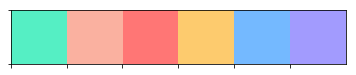

In [58]:
color_board =["#55efc4", "#fab1a0", "#ff7675",  "#fdcb6e", "#74b9ff", "#a29bfe" ]
sns.set_palette(color_board)
sns.palplot(color_board)

Text(0.5,1,'评论星级占比情况统计')

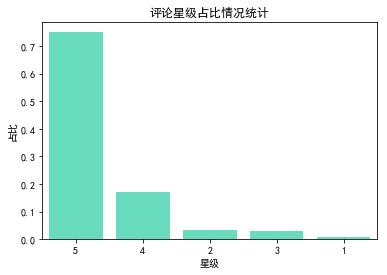

In [59]:
num_rating = df_shawshank.shape[0]
max_prop = df_shawshank["rating"].value_counts().max() / num_rating
tick_props = np.arange(0, max_prop, 0.1)
tick_names = ["{:0.1f}".format(item) for item in tick_props]

sns.countplot(data = df_shawshank, x = "rating", color = sns.color_palette()[0])
plt.yticks(tick_props * num_rating, tick_names)
plt.xlabel("星级")
plt.ylabel("占比")
plt.title("评论星级占比情况统计")

In [69]:
stopwords = ["这", "电影", "但", "是", "它", "了"]

In [70]:
wordcloud = WordCloud(background_color = color_board[1])

In [29]:
# 提取用户名
user_id = [item("a").text() for item in query("span.comment-info").items()]
user_id

['犀牛',
 'kingfish',
 '如小果',
 'Eve|Classified',
 '711|湯行運',
 '艾小柯',
 '小易甫',
 '林隐',
 '寂地',
 'seawaver',
 '影志',
 '葱',
 '珍妮的肖像',
 'veronique',
 '咱说',
 '眠去',
 '小耳朵图吗',
 '挽梦忆笙歌',
 '小海',
 '文泽尔']

['374',
 '152',
 '242',
 '110',
 '145',
 '89',
 '120',
 '169',
 '1779',
 '97',
 '106',
 '259',
 '80',
 '86',
 '86',
 '1183',
 '62',
 '124',
 '110',
 '73']

In [9]:
# 获取星级
rating = []
# span.comment-info
for item in query("span").items():
    if item.attr("class") and ("allstar" in item.attr("class")):
        rating.append(item.attr("class")[len("allstar")])
rating

['5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5']

In [10]:
# 获取评论
comments = [item.text() for item in query("span.short").items()]
comments

['当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越来越多的人们心中的地位已超越了《阿甘》。每当现实令我疲惫得产生无力感，翻出这张碟，就重获力量。毫无疑问，本片位列男人必看的电影前三名！回顾那一段经典台词：“有的人的羽翼是如此光辉，即使世界上最黑暗的牢狱，也无法长久地将他围困！”',
 '不需要女主角的好电影',
 '恐惧让你沦为囚犯，希望让你重获自由。——《肖申克的救赎》',
 '“这是一部男人必看的电影。”人人都这么说。但单纯从性别区分，就会让这电影变狭隘。《肖申克的救赎》突破了男人电影的局限，通篇几乎充满令人难以置信的温馨基调，而电影里最伟大的主题是“希望”。 当我们无奈地遇到了如同肖申克一般囚禁了心灵自由的那种囹圄，我们是无奈的老布鲁克，灰心的瑞德，还是智慧的安迪？运用智慧，信任希望，并且勇敢面对恐惧心理，去打败它？ 经典的电影之所以经典，因为他们都在做同一件事——让你从不同的角度来欣赏希望的美好。',
 '策划了19年的私奔……',
 '人的生命不过是从一个洞穴通往另一个世界..然后在那个世界的雨中继续颤抖.i hope',
 '关于希望最强有力的注释。',
 '有种鸟是关不住的.',
 '超级喜欢超级喜欢,不看的话人生不圆满.',
 '忒经典的东西,我要带去我的坟墓',
 'Hope is a good thing, and maybe the best thing of all.',
 'Fear Can Hold You Prisoner, Hope Can Set You Free',
 '这样的男人谁会舍得背叛。。。',
 '没有人会不喜欢吧！书和电影都好。',
 '一部没有爱情与美女的电影,却光芒四射',
 '因为1994年台湾引进了一部比较卖座的老片The Sting，被错译成了《刺激》。到了1995年本片上映时，片商觉得其剧情与《刺激》有类似的地方（大概都属于高智商的复仇？），因此被译成了《刺激1995》，1998年又有一部片子Return To Paradise因为含有牢狱情节，被译成《刺激1998》！',
 'hope is a good thing',
 '越狱我感觉就是改编自这个',
 '一部没有女主，没有爱情，没有特技的好片子，也是很多大学英语老师喜欢放给学生看的片子，这部片子讲诉的就是

创建Pandas表单

In [11]:
columns = ["user_id", "votes", "rating", "comments"]
dataset = [user_id, votes, rating, comments]
df_movie = pd.DataFrame()
for column_name, data in zip(columns, dataset):
    df_movie[column_name] = pd.Series(data)
df_movie 

,user_id,votes,rating,comments
0,犀牛,13789,5,当年的奥斯卡颁奖礼上，被如日中天的《阿甘正传》掩盖了它的光彩，而随着时间的推移，这部电影在越...
1,kingfish,24709,5,不需要女主角的好电影
2,如小果,14753,5,恐惧让你沦为囚犯，希望让你重获自由。——《肖申克的救赎》
3,Eve|Classified,6644,5,“这是一部男人必看的电影。”人人都这么说。但单纯从性别区分，就会让这电影变狭隘。《肖申克的救...
4,711|湯行運,12035,5,策划了19年的私奔……
5,文泽尔,2023,4,人的生命不过是从一个洞穴通往另一个世界..然后在那个世界的雨中继续颤抖.i hope
6,艾小柯,8067,5,关于希望最强有力的注释。
7,林隐,7612,5,有种鸟是关不住的.
8,寂地,4370,5,"超级喜欢超级喜欢,不看的话人生不圆满."
9,seawaver,4212,5,"忒经典的东西,我要带去我的坟墓"
